# A Machine Learning Approach to Equity Premium Prediction
By Shane Johnson, Catherine Markley, Yuanhao Niu, Nick Rocco (Fall 2018 Data Science Project)

We try to use machine learning methods to predict equity premium based on predictors from the seminal paper of Goyal and Welch (2008) updates until 2013. Our algorithms improves the prediction of equity premium

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("raw_predictors_until2013.csv")

Generate the predictors based on the raw data, as in Welch and Goyal (2008)

In [2]:
# equity premium, i.e., the total rate of return on the stock market minus the prevailing short-term interest rate.
df['premium'] = df['CRSP_SPvw'] - df['Rfree']

# Dividend Price Ratio (d/p) is the difference between the log of dividends and the log of prices. 
df['d/p'] = np.log(df['D12']) - np.log(df['Index'])

# Dividend Yield (d/y) is the difference between the log of dividends and the log of lagged prices.
df['d/y'] = np.log(df['D12'])- np.log(df['Index'].shift(1))

# Earnings Price Ratio (e/p) is the difference between the log of earnings and the log of prices.
df['e/p'] = np.log(df['E12']) - np.log(df['Index'])

# Dividend Payout Ratio (d/e) is the difference between the log of dividends and the log of earnings.
df['d/e'] = np.log(df['D12']) - np.log(df['E12'])

# Term Spread (tms) is the difference between the long term yield on government bonds and the T-bill.
df['tms'] = df['lty'] - df['tbl']

# Default Yield Spread (dfy): is the difference between BAA- and AAA- rated cor- porate bond yields.
df['dfy'] = df['BAA'] - df['AAA']

# Default Return Spread (dfr): is the difference between the return on long-term corporate bonds and returns on the long-term government bonds.
df['dfr'] = df['corpr'] - df['ltr']

In [3]:
# drop the first observation for 1926/12
df = df[1:]

We generate indicators for bull market. Machine learning methods are also used to predict the dicretion of market movements. 

In [4]:
sLength = len(df['yyyymm'])
# add the bullMarket column with random ints (to be replaced in next cell)
df['bull'] = pd.Series(np.random.randn(sLength), index=df.index)
# Create bullMarkert for ret
bull = []
for d in df['CRSP_SPvw']:
    if d > 0:
        bull.append(1)
    else:
        bull.append(0)
df['bull'] = bull

In [5]:
# drop the redundent variables
df = df.drop(columns=['Index','D12', 'E12', 'AAA', 'BAA', 'CRSP_SPvwx', 'corpr','Rfree', 'CRSP_SPvw'])

In [6]:
pd.options.mode.chained_assignment=None
df['csp'][0:124] = df['csp'][124:911].mean()
df['csp'][912:]  = df['csp'][124:911].mean()

In [7]:
premium = 0
count = 0

temp = df['premium']

cumsum = []

for i in temp:
    premium += i
    count += 1
    cumsum.append(premium/count)

df['cumsum'] = cumsum

In [8]:
# reorganize the dataframe
df = df[['yyyymm','Month','cumsum','bull','premium','d/p','d/y','e/p','d/e','svar',
          'csp','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl']]
df

,yyyymm,Month,cumsum,bull,premium,d/p,d/y,e/p,d/e,svar,csp,b/m,ntis,tbl,lty,ltr,tms,dfy,dfr,infl
1,192701,1,-0.005602,0,-0.005602,-2.942374,-2.963349,-2.374773,-0.567601,0.000470,0.00037,0.443706,0.050834,0.0323,0.0351,0.0075,0.0028,0.0095,-0.0019,-0.011299
2,192702,2,0.018589,1,0.042780,-2.979535,-2.932946,-2.430353,-0.549182,0.000287,0.00037,0.428501,0.051682,0.0329,0.0347,0.0088,0.0018,0.0092,-0.0019,-0.005714
3,192703,3,0.013945,1,0.004657,-2.976535,-2.970053,-2.445079,-0.531456,0.000924,0.00037,0.469765,0.046370,0.0320,0.0331,0.0253,0.0011,0.0092,-0.0170,-0.005747
4,192704,4,0.013008,1,0.010196,-2.984225,-2.967143,-2.471309,-0.512916,0.000603,0.00037,0.456754,0.050518,0.0339,0.0333,-0.0005,-0.0006,0.0090,0.0060,0.000000
5,192705,5,0.022322,1,0.059578,-3.025963,-2.975058,-2.531446,-0.494518,0.000392,0.00037,0.434783,0.055279,0.0333,0.0327,0.0109,-0.0006,0.0093,-0.0120,0.005780
6,192706,6,0.014780,0,-0.022928,-3.007309,-3.016743,-2.531330,-0.475979,0.000825,0.00037,0.452385,0.058826,0.0307,0.0334,-0.0069,0.0027,0.0097,0.0112,0.011494
7,192707,7,0.024381,1,0.081983,-3.061144,-2.998173,-2.603707,-0.457437,0.000426,0.00037,0.414553,0.059754,0.0296,0.0333,0.0050,0.0037,0.0095,-0.0047,-0.017045
8,192708,8,0.025217,1,0.031070,-3.095764,-3.052225,-2.656742,-0.439023,0.001276,0.00037,0.396227,0.054526,0.0270,0.0329,0.0076,0.0059,0.0092,0.0007,-0.005780
9,192709,9,0.028058,1,0.050783,-3.129097,-3.086791,-2.707759,-0.421338,0.001123,0.00037,0.380586,0.094617,0.0268,0.0330,0.0018,0.0062,0.0088,0.0131,0.005814
10,192710,10,0.020315,0,-0.049371,-3.065650,-3.120203,-2.662875,-0.402774,0.001559,0.00037,0.413801,0.094370,0.0308,0.0325,0.0099,0.0017,0.0087,-0.0044,0.005780


In [9]:
features = df[['premium','d/p','d/y','e/p','d/e','svar',
          'csp','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl']]
features.corr()

,premium,d/p,d/y,e/p,d/e,svar,csp,b/m,ntis,tbl,lty,ltr,tms,dfy,dfr,infl
premium,1.000000,-0.056434,0.063451,-0.058598,-0.003753,-0.188608,0.069422,-0.056720,-0.073504,-0.064743,-0.050359,0.088302,0.044983,-0.008912,0.142555,-0.001664
d/p,-0.056434,1.000000,0.992713,0.714175,0.474247,0.186807,0.397458,0.836060,0.149774,-0.068721,-0.132593,-0.021872,-0.119783,0.401169,-0.006139,-0.028503
d/y,0.063451,0.992713,1.000000,0.709334,0.470334,0.157295,0.403178,0.829082,0.141639,-0.069958,-0.133125,-0.011220,-0.118013,0.395991,0.010664,-0.026056
e/p,-0.058598,0.714175,0.709334,1.000000,-0.277550,-0.103158,0.273220,0.706632,0.074389,0.221115,0.103081,-0.003992,-0.299506,0.017633,-0.077303,0.153233
d/e,-0.003753,0.474247,0.470334,-0.277550,1.000000,0.386142,0.201868,0.258726,0.112003,-0.372430,-0.311636,-0.024999,0.212304,0.528429,0.088803,-0.231852
svar,-0.188608,0.186807,0.157295,-0.103158,0.386142,1.000000,0.015687,0.185605,-0.047950,-0.172325,-0.115262,0.077837,0.159484,0.567645,-0.071673,-0.215883
csp,0.069422,0.397458,0.403178,0.273220,0.201868,0.015687,1.000000,0.211180,0.126371,-0.519276,-0.617150,-0.098181,-0.090616,0.034044,0.004015,-0.021469
b/m,-0.056720,0.836060,0.829082,0.706632,0.258726,0.185605,0.211180,1.000000,-0.070592,0.130460,0.100142,-0.003186,-0.093468,0.462714,-0.013835,0.087765
ntis,-0.073504,0.149774,0.141639,0.074389,0.112003,-0.047950,0.126371,-0.070592,1.000000,-0.041509,-0.169661,-0.064757,-0.261968,-0.216257,0.031425,-0.073952
tbl,-0.064743,-0.068721,-0.069958,0.221115,-0.372430,-0.172325,-0.519276,0.130460,-0.041509,1.000000,0.904207,0.052908,-0.427280,-0.091346,-0.046993,0.261650


We recognize the autocorrelation in time series. In order to take full advantage of the past data, we include the past 20 years' data in the prediction. Here we generate predictors for the past 20 years, i.e. 240 months

In [10]:
past = 241

num = len(df.columns)
for i in range(4,num):
    name = df.columns[i]
    for j in range(1,past):
        t = str(j)
        df[name+"-"+t] = df[name].shift(j)

In [11]:
# drop the first past 20 years predictors
df = df[past-1:]

In [12]:
# drop the contemporanous predictors
df = df.drop(columns=['d/p','d/y','e/p','d/e','svar',
          'csp','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl'])

In [13]:
# column number 3845: 'yyyymm','Month',‘cumsum’，'bull','premium' + 16 indicator * 240 months 
len(df.columns)

3845

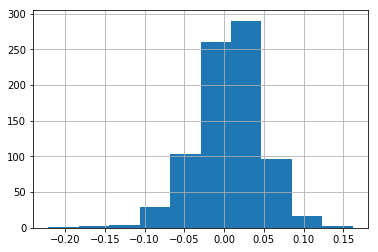

In [20]:
hist = df["premium"].hist(bins=10)

## Regression (Equity Premium Prediction)

In [15]:
# for regression purpose
ret = df.premium
x = df.iloc[:,4:]

We will first start with the simplest linear regression model. 

In [16]:
# Here are 67 years of data prior to 2013 
# Spilt the data into 7 folds and cross-validate
# In each sample we have around 10 years of data

# Linear Regression Model (Benmark)

pd.options.mode.chained_assignment=None
import math
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.cross_validation import KFold

kf = KFold(x.shape[0],n_folds=7, shuffle=True)


diff_MAE = []
diff_RMSE = []

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    ret_train, ret_test = ret.iloc[train_index], ret.iloc[test_index]

    regr = linear_model.LinearRegression()
    regr.fit(x_train, ret_train)

    ret_pred = regr.predict(x_test)

    
    diff = df['cumsum'].iloc[train_index] - df['premium'].iloc[train_index]
    mae_avg = diff.abs().sum() / len(train_index)
    diff_MAE.append(mae_avg - mean_absolute_error(ret_test, ret_pred))
    rmse_avg = math.sqrt(np.power(diff, 2).sum() / len(train_index))
    diff_RMSE.append(rmse_avg - mean_squared_error(ret_test, ret_pred))

    r_squared = r2_score(ret_test, ret_pred)
    adjusted_r_squared = 1 - (1-r_squared)*(len(ret_test)-1)/(len(ret_test)-x_test.shape[1]-1)
    
    print("MAE of regression: ", mean_absolute_error(ret_test, ret_pred))
    print("MAE of hist average: ", mae_avg)
    print("Diff MAE: ", mae_avg - mean_absolute_error(ret_test, ret_pred))
    print("RMSE of regression: ", mean_squared_error(ret_test, ret_pred))
    print("RMSE of hist average: ", rmse_avg)
    print("Diff RMSE: ", rmse_avg - mean_squared_error(ret_test, ret_pred))
    print("adjusted R2:", adjusted_r_squared)
    print("-------------------------------------------------------------------")
    
print( "the main take way: Mean(Diff_MAE) is", round(sum(diff_MAE)/len(diff_MAE),4),
      "Mean(Diff_RMSE) is", round(sum(diff_RMSE)/len(diff_RMSE),4))

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


MAE of regression:  0.009317777459759155
MAE of hist average:  0.03136982921471355
Diff MAE:  0.022052051754954394
RMSE of regression:  0.00015061126194666646
RMSE of hist average:  0.040812625675252054
Diff RMSE:  0.040662014413305386
adjusted R2: 1.0020234587151713
-------------------------------------------------------------------
MAE of regression:  0.008027066089904415
MAE of hist average:  0.03203541143595511
Diff MAE:  0.024008345346050695
RMSE of regression:  0.00010564631546311173
RMSE of hist average:  0.0420573968353341
Diff RMSE:  0.04195175051987098
adjusted R2: 1.0019231127607646
-------------------------------------------------------------------
MAE of regression:  0.007821963103915338
MAE of hist average:  0.03216226884370183
Diff MAE:  0.024340305739786496
RMSE of regression:  9.877561637906655e-05
RMSE of hist average:  0.042129192612232406
Diff RMSE:  0.04203041699585334
adjusted R2: 1.0018578655982788
-----------------------------------------------------------------

In [17]:
# Random Forrest # Davids paper: random forest regression with 100 regression trees as a the forecasting function gt.

pd.options.mode.chained_assignment=None
from sklearn.ensemble import RandomForestRegressor

diff_MAE = []
diff_RMSE = []

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    ret_train, ret_test = ret.iloc[train_index], ret.iloc[test_index]
    
    regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
    regr.fit(x_train, ret_train)
    
    ret_pred = regr.predict(x_test)

    
    diff = df['cumsum'].iloc[train_index] - df['premium'].iloc[train_index]
    mae_avg = diff.abs().sum() / len(train_index)
    diff_MAE.append(mae_avg - mean_absolute_error(ret_test, ret_pred))
    rmse_avg = math.sqrt(np.power(diff, 2).sum() / len(train_index))
    diff_RMSE.append(rmse_avg - mean_squared_error(ret_test, ret_pred))

    r_squared = r2_score(ret_test, ret_pred)
    adjusted_r_squared = 1 - (1-r_squared)*(len(ret_test)-1)/(len(ret_test)-x_test.shape[1]-1)
    
    print("MAE of regression: ", mean_absolute_error(ret_test, ret_pred))
    print("MAE of hist average: ", mae_avg)
    print("Diff MAE: ", mae_avg - mean_absolute_error(ret_test, ret_pred))
    print("RMSE of regression: ", mean_squared_error(ret_test, ret_pred))
    print("RMSE of hist average: ", rmse_avg)
    print("Diff RMSE: ", rmse_avg - mean_squared_error(ret_test, ret_pred))
    print("adjusted R2:", adjusted_r_squared)
    print("-------------------------------------------------------------------")
    
print( "the main take way: Mean(Diff_MAE) is", round(sum(diff_MAE)/len(diff_MAE),4),
      "Mean(Diff_RMSE) is", round(sum(diff_RMSE)/len(diff_RMSE),4))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


MAE of regression:  0.01132152801069801
MAE of hist average:  0.03136982921471355
Diff MAE:  0.020048301204015538
RMSE of regression:  0.00033526130283630383
RMSE of hist average:  0.040812625675252054
Diff RMSE:  0.04047736437241575
adjusted R2: 1.0045042276142935
-------------------------------------------------------------------
MAE of regression:  0.008568864318385504
MAE of hist average:  0.03203541143595511
Diff MAE:  0.023466547117569608
RMSE of regression:  0.00012376428873678676
RMSE of hist average:  0.0420573968353341
Diff RMSE:  0.04193363254659731
adjusted R2: 1.002252919867137
-------------------------------------------------------------------
MAE of regression:  0.010238290221608961
MAE of hist average:  0.03216226884370183
Diff MAE:  0.02192397862209287
RMSE of regression:  0.00017170883159956332
RMSE of hist average:  0.042129192612232406
Diff RMSE:  0.04195748378063284
adjusted R2: 1.0032296627735051
-------------------------------------------------------------------


In [18]:
# # Random Forrest (another implementation)
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestRegressor

# regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=10)
# regr.fit(x_train, ret_train)
# cross_val_score(regr, x, ret, scoring='neg_mean_squared_error',cv=7)  

In [19]:
# Boosted

from sklearn.ensemble import GradientBoostingRegressor

diff_MAE = []
diff_RMSE = []

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    ret_train, ret_test = ret.iloc[train_index], ret.iloc[test_index]
    
    regr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
    regr.fit(x_train, ret_train)
    
    ret_pred = regr.predict(x_test)
    
    diff = df['cumsum'].iloc[train_index] - df['premium'].iloc[train_index]
    mae_avg = diff.abs().sum() / len(train_index)
    diff_MAE.append(mae_avg - mean_absolute_error(ret_test, ret_pred))
    rmse_avg = math.sqrt(np.power(diff, 2).sum() / len(train_index))
    diff_RMSE.append(rmse_avg - mean_squared_error(ret_test, ret_pred))

    r_squared = r2_score(ret_test, ret_pred)
    adjusted_r_squared = 1 - (1-r_squared)*(len(ret_test)-1)/(len(ret_test)-x_test.shape[1]-1)
    
    print("MAE of regression: ", mean_absolute_error(ret_test, ret_pred))
    print("MAE of hist average: ", mae_avg)
    print("Diff MAE: ", mae_avg - mean_absolute_error(ret_test, ret_pred))
    print("RMSE of regression: ", mean_squared_error(ret_test, ret_pred))
    print("RMSE of hist average: ", rmse_avg)
    print("Diff RMSE: ", rmse_avg - mean_squared_error(ret_test, ret_pred))
    print("adjusted R2:", adjusted_r_squared)
    print("-------------------------------------------------------------------")
    
print( "the main take way: Mean(Diff_MAE) is", round(sum(diff_MAE)/len(diff_MAE),4),
      "Mean(Diff_RMSE) is", round(sum(diff_RMSE)/len(diff_RMSE),4))

MAE of regression:  0.0030200116433553538
MAE of hist average:  0.03136982921471355
Diff MAE:  0.028349817571358193
RMSE of regression:  7.128386889864431e-05
RMSE of hist average:  0.040812625675252054
Diff RMSE:  0.04074134180635341
adjusted R2: 1.0009576970799512
-------------------------------------------------------------------
MAE of regression:  0.0018246716002137092
MAE of hist average:  0.03203541143595511
Diff MAE:  0.030210739835741404
RMSE of regression:  8.140285433911966e-06
RMSE of hist average:  0.0420573968353341
Diff RMSE:  0.04204925654990019
adjusted R2: 1.0001481801492613
-------------------------------------------------------------------
MAE of regression:  0.0017053372046949584
MAE of hist average:  0.03216226884370183
Diff MAE:  0.030456931639006875
RMSE of regression:  7.899863926170862e-06
RMSE of hist average:  0.042129192612232406
Diff RMSE:  0.042121292748306234
adjusted R2: 1.0001485881430816
----------------------------------------------------------------